In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [33]:
def get_pos_neg_words():
    def get_words(url):
        import requests
        words = requests.get(url).content.decode('latin-1')
        word_list = words.split('\n')
        index = 0
        while index < len(word_list):
            word = word_list[index]
            if ';' in word or not word:
                word_list.pop(index)
            else:
                index+=1
        return word_list

    #Get lists of positive and negative words
    p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
    n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
    positive_words = get_words(p_url)
    negative_words = get_words(n_url)
    return positive_words,negative_words

positive_words,negative_words = get_pos_neg_words()

In [34]:
negative_words

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',


In [35]:
with open('data/community.txt','r') as f:
    community = f.read()
with open('data/le_monde.txt','r') as f:
    le_monde = f.read()


In [36]:
community

'I ate here Monday night for a working dinner with a coworker. I immediately saw its reason for name, beyond the owner\'s fandom of the show of the same name: the tablet setup are nearly all communal long tables. There\'re rather few non-shared tables which is fine as not only is NYC filled with such setup but there\'s a liveliness in the Columbia area vibe which prefers this setup. There\'s a shortage of such nice sit-down restaurants in the Columbia area so this place is not only capitalizing on its presence but doing so with great style and flare.\n\nI ordered the beef burger which was very juicy, perfectly lean, well sauced, cooked as desired (medium-well, for those who wonder), and paired with a dill pickle, a handmade cole slaw that lacked mayo (which is good as mayo\'s pure trans-fat), and a spindle of fries. My coworker got the salmon sandwich, same review applies.\n\nAwesome bar alongside, but we didn\'t patronize it. Vast amounts of seating and an open kitchen where tons of f

In [37]:
def do_pos_neg_sentiment_analysis(text_list,debug=False):
    positive_words,negative_words = get_pos_neg_words()
    from nltk import word_tokenize
    results = list()
    for text in text_list:
        cpos = cneg = lpos = lneg = 0
        for word in word_tokenize(text[1]):
            if word in positive_words:
                if debug:
                    print("Positive",word)
                cpos+=1
            if word in negative_words:
                if debug:
                    print("Negative",word)
                cneg+=1
        results.append((text[0],cpos/len(word_tokenize(text[1])),cneg/len(word_tokenize(text[1]))))
    return results

do_pos_neg_sentiment_analysis([('community',community),('le_monde',le_monde)])

[('community', 0.0508646998982706, 0.011190233977619531),
 ('le_monde', 0.053342336259284265, 0.014854827819041188)]

In [39]:
nrc = "data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
count=0
emotion_dict=dict()
with open(nrc,'r') as f:
    all_lines = list()
    for line in f:
        if count < 46:
            count+=1
            continue
        line = line.strip().split('\t')
        if int(line[2]) == 1:
            if emotion_dict.get(line[0]):
                emotion_dict[line[0]].append(line[1])
            else:
                emotion_dict[line[0]] = [line[1]]
        

In [40]:
emotion_dict

{'abacus': ['trust'],
 'abandon': ['fear', 'negative', 'sadness'],
 'abandoned': ['anger', 'fear', 'negative', 'sadness'],
 'abandonment': ['anger', 'fear', 'negative', 'sadness', 'surprise'],
 'abba': ['positive'],
 'abbot': ['trust'],
 'abduction': ['fear', 'negative', 'sadness', 'surprise'],
 'aberrant': ['negative'],
 'aberration': ['disgust', 'negative'],
 'abhor': ['anger', 'disgust', 'fear', 'negative'],
 'abhorrent': ['anger', 'disgust', 'fear', 'negative'],
 'ability': ['positive'],
 'abject': ['disgust', 'negative'],
 'abnormal': ['disgust', 'negative'],
 'abolish': ['anger', 'negative'],
 'abolition': ['negative'],
 'abominable': ['disgust', 'fear', 'negative'],
 'abomination': ['anger', 'disgust', 'fear', 'negative'],
 'abort': ['negative'],
 'abortion': ['disgust', 'fear', 'negative', 'sadness'],
 'abortive': ['negative', 'sadness'],
 'abovementioned': ['positive'],
 'abrasion': ['negative'],
 'abrogate': ['negative'],
 'abrupt': ['surprise'],
 'abscess': ['negative', 'sad

In [43]:
def get_nrc_data():
    nrc = "data/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
    count=0
    emotion_dict=dict()
    with open(nrc,'r') as f:
        all_lines = list()
        for line in f:
            if count < 46:
                count+=1
                continue
            line = line.strip().split('\t')
            if int(line[2]) == 1:
                if emotion_dict.get(line[0]):
                    emotion_dict[line[0]].append(line[1])
                else:
                    emotion_dict[line[0]] = [line[1]]
    return emotion_dict

In [44]:
emotion_dict = get_nrc_data()
emotion_dict['abandoned']

['anger', 'fear', 'negative', 'sadness']

In [45]:
def emotion_analyzer(text,emotion_dict=emotion_dict):
    #Set up the result dictionary
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    #Analyze the text and normalize by total number of words
    total_words = len(text.split())
    for word in text.split():
        if emotion_dict.get(word):
            for emotion in emotion_dict.get(word):
                emotion_count[emotion] += 1/len(text.split())
    return emotion_count

In [46]:
def comparative_emotion_analyzer(text_tuples,object_name="Restaurant",print_output=False):
    if print_output:
        print("%-20s %1s\t%1s %1s %1s %1s   %1s %1s %1s %1s"%(object_name,
                                                              "fear","trust","negative","positive",
                                                              "joy","disgust","anticip", "sadness",
                                                              "surprise"))
    import pandas as pd
    df = pd.DataFrame(columns=[object_name,'Fear','Trust','Negative',
                           'Positive','Joy','Disgust','Anticipation',
                           'Sadness','Surprise'],)
    df.set_index(object_name,inplace=True)
    
    output = df    
    for text_tuple in text_tuples:
        text = text_tuple[1] 
        result = emotion_analyzer(text)
        if print_output:
            print("%-20s %1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f"%(
                text_tuple[1][0:20],result['fear'],result['trust'],
                  result['negative'],result['positive'],result['joy'],result['disgust'],
                  result['anticipation'],result['sadness'],result['surprise']))
        df.loc[text_tuple[0]] = [result['fear'],result['trust'],
                  result['negative'],result['positive'],result['joy'],result['disgust'],
                  result['anticipation'],result['sadness'],result['surprise']]
    return output
#And test it        
comparative_emotion_analyzer([('community',community),('le_monde',le_monde)])

,Fear,Trust,Negative,Positive,Joy,Disgust,Anticipation,Sadness,Surprise
Restaurant,,,,,,,,,
community,0.004172,0.029797,0.010727,0.045292,0.023242,0.003576,0.019070,0.008343,0.009535
le_monde,0.003094,0.032483,0.007734,0.047951,0.027842,0.001547,0.016241,0.001547,0.007734


In [47]:
import nltk
from nltk.corpus import PlaintextCorpusReader
community_root = "data/community"
le_monde_root = "data/le_monde"
community_files = "community.*"
le_monde_files = "le_monde.*"
shakeshack_root = "data/shakeshack"
shakeshack_files = "shakeshack.*"
fiveguys_root = "data/fiveguys"
fiveguys_files = "fiveguys.*"
community_data = PlaintextCorpusReader(community_root,community_files)
le_monde_data = PlaintextCorpusReader(le_monde_root,le_monde_files)
shakeshack_data = PlaintextCorpusReader(shakeshack_root,shakeshack_files)
fiveguys_data = PlaintextCorpusReader(fiveguys_root,fiveguys_files)

In [48]:
shakeshack_data.fileids()

['shakeshack.1',
 'shakeshack.10',
 'shakeshack.11',
 'shakeshack.12',
 'shakeshack.13',
 'shakeshack.14',
 'shakeshack.15',
 'shakeshack.16',
 'shakeshack.17',
 'shakeshack.18',
 'shakeshack.19',
 'shakeshack.2',
 'shakeshack.20',
 'shakeshack.3',
 'shakeshack.4',
 'shakeshack.5',
 'shakeshack.6',
 'shakeshack.7',
 'shakeshack.8',
 'shakeshack.9']

In [49]:
shakeshack_data.raw()

'So this Shake Shack was a surprise for me and I decided to eat here while waiting to meet someone.  I was eating my Chick \'n Shack sandwich and fries, nearly finishing my sandwich when I took a bite and felt something hard.  It turns out there was a bone in my chicken sandwich.  That squicked me out, making me cautious of finishing that sandwich.\n\nI take this bone out and snap a picture, figuring I\'ll complain to the corporate offices later & try to finish my meal while waiting for my person.  \n\nA staff member comes up and asks "how was everything?"  I told him about finding the bone in my sandwich and showed it to him.  He walks off and then another staff member (perhaps the manager) walks up and asks if I have my receipt.  I give it to him and he says "I\'ll take this off your bill and get you another meal."  I figured I would only get a replacement sandwich or a credit but I got a replacement meal (sandwich and fries) AND refunded my money.\n\nI have to give 5 stars for the h

In [50]:
restaurant_data = [('community',community_data.raw()),
                   ('le monde',le_monde_data.raw()),
                  ('shakeshack',shakeshack_data.raw()),
                   ('fiveguys',fiveguys_data.raw())]
comparative_emotion_analyzer(restaurant_data)

,Fear,Trust,Negative,Positive,Joy,Disgust,Anticipation,Sadness,Surprise
Restaurant,,,,,,,,,
community,0.004079,0.031691,0.013179,0.048008,0.027298,0.005020,0.021023,0.007217,0.010668
le monde,0.004004,0.026246,0.010231,0.043594,0.024466,0.003559,0.015125,0.003559,0.008897
shakeshack,0.009532,0.019065,0.019973,0.031321,0.016795,0.007717,0.016795,0.009079,0.005901
fiveguys,0.004564,0.022818,0.019395,0.035938,0.026811,0.005134,0.021677,0.008557,0.008557


In [51]:
from nltk.book import *

In [52]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [53]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [54]:
all_addresses = list()
for file in inaugural.fileids():
    all_addresses.append((file,inaugural.raw(file)))
all_addresses

[('1789-Washington.txt',
  'Fellow-Citizens of the Senate and of the House of Representatives:\n\nAmong the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order, and received on the 14th day of the present month. On the one hand, I was summoned by my Country, whose voice I can never hear but with veneration and love, from a retreat which I had chosen with the fondest predilection, and, in my flattering hopes, with an immutable decision, as the asylum of my declining years -- a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination, and of frequent interruptions in my health to the gradual waste committed on it by time. On the other hand, the magnitude and difficulty of the trust to which the voice of my country called me, being sufficient to awaken in the wisest and most experienced of her citizens a distrustful scrutiny into hi

In [55]:
all_speeches = comparative_emotion_analyzer(all_addresses,print_output=False,object_name="President")

In [56]:
all_speeches

,Fear,Trust,Negative,Positive,Joy,Disgust,Anticipation,Sadness,Surprise
President,,,,,,,,,
1789-Washington.txt,0.015374,0.041929,0.023061,0.069881,0.025157,0.003494,0.027952,0.007687,0.010482
1793-Washington.txt,0.014815,0.066667,0.014815,0.088889,0.029630,0.000000,0.014815,0.007407,0.007407
1797-Adams.txt,0.014230,0.051315,0.025011,0.079776,0.029754,0.005175,0.027167,0.007762,0.008193
1801-Jefferson.txt,0.021387,0.042775,0.027168,0.072832,0.030636,0.006936,0.022543,0.012717,0.012139
1805-Jefferson.txt,0.012921,0.050300,0.023535,0.075219,0.027227,0.005076,0.031380,0.006461,0.011998
1809-Madison.txt,0.020391,0.049278,0.037383,0.093458,0.039082,0.005098,0.039082,0.011895,0.010195
1813-Madison.txt,0.033884,0.042149,0.042975,0.066116,0.023140,0.011570,0.023140,0.015702,0.008264
1817-Monroe.txt,0.014527,0.043878,0.024904,0.075304,0.024014,0.004447,0.027275,0.008301,0.009487
1821-Monroe.txt,0.019239,0.033557,0.025503,0.055705,0.017002,0.005593,0.019463,0.008501,0.005145


In [57]:
all_speeches.sort_values(by="Positive",ascending=False)

,Fear,Trust,Negative,Positive,Joy,Disgust,Anticipation,Sadness,Surprise
President,,,,,,,,,
1829-Jackson.txt,0.015044,0.054867,0.023009,0.107080,0.025664,0.004425,0.033628,0.006195,0.010619
1809-Madison.txt,0.020391,0.049278,0.037383,0.093458,0.039082,0.005098,0.039082,0.011895,0.010195
1793-Washington.txt,0.014815,0.066667,0.014815,0.088889,0.029630,0.000000,0.014815,0.007407,0.007407
1885-Cleveland.txt,0.018991,0.052226,0.029080,0.086053,0.026113,0.007715,0.031454,0.010089,0.010089
1949-Truman.txt,0.016674,0.046512,0.019307,0.085564,0.028082,0.003949,0.025011,0.008337,0.007898
1849-Taylor.txt,0.011938,0.048669,0.018365,0.083563,0.020202,0.001837,0.022957,0.005510,0.010101
1977-Carter.txt,0.013788,0.050284,0.022709,0.082725,0.035685,0.003244,0.028386,0.006488,0.009732
1797-Adams.txt,0.014230,0.051315,0.025011,0.079776,0.029754,0.005175,0.027167,0.007762,0.008193
1945-Roosevelt.txt,0.012259,0.049037,0.015762,0.078809,0.033275,0.001751,0.033275,0.003503,0.005254


In [58]:
all_speeches.sort_values(by="Surprise",ascending=False)
all_speeches["All_Pos"]=(all_speeches['Trust']+all_speeches['Positive']+ all_speeches['Joy']+ all_speeches['Anticipation'])
all_speeches["All_Neg"]=(all_speeches['Fear']+all_speeches['Negative']+ all_speeches['Disgust']+ all_speeches['Sadness'])
all_speeches['Net']=all_speeches["All_Pos"]-all_speeches["All_Neg"]
all_speeches.sort_values(by="Net",ascending=False)['Net']

President
1829-Jackson.txt       0.172566
1793-Washington.txt    0.162963
1945-Roosevelt.txt     0.161121
1977-Carter.txt        0.150852
1809-Madison.txt       0.146134
1849-Taylor.txt        0.137741
1949-Truman.txt        0.136902
1805-Jefferson.txt     0.136133
1797-Adams.txt         0.135834
1885-Cleveland.txt     0.129970
1973-Nixon.txt         0.124244
1953-Eisenhower.txt    0.122060
1925-Coolidge.txt      0.121055
1961-Kennedy.txt       0.120144
1817-Monroe.txt        0.118292
1957-Eisenhower.txt    0.116459
1789-Washington.txt    0.115304
1869-Grant.txt         0.112489
1877-Hayes.txt         0.107272
2005-Bush.txt          0.107004
1889-Harrison.txt      0.106451
1929-Hoover.txt        0.103564
1825-Adams.txt         0.103425
1853-Pierce.txt        0.103355
1917-Wilson.txt        0.103066
1897-McKinley.txt      0.102190
2013-Obama.txt         0.101896
1833-Jackson.txt       0.101868
1801-Jefferson.txt     0.100578
2017-Trump.txt         0.100410
1981-Reagan.txt        0.09873

In [59]:
all_addresses

[('1789-Washington.txt',
  'Fellow-Citizens of the Senate and of the House of Representatives:\n\nAmong the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order, and received on the 14th day of the present month. On the one hand, I was summoned by my Country, whose voice I can never hear but with veneration and love, from a retreat which I had chosen with the fondest predilection, and, in my flattering hopes, with an immutable decision, as the asylum of my declining years -- a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination, and of frequent interruptions in my health to the gradual waste committed on it by time. On the other hand, the magnitude and difficulty of the trust to which the voice of my country called me, being sufficient to awaken in the wisest and most experienced of her citizens a distrustful scrutiny into hi

In [60]:
do_pos_neg_sentiment_analysis([(x[0],x[1]) for x in all_addresses])

[('1789-Washington.txt', 0.05530253741054001, 0.02147039687703318),
 ('1793-Washington.txt', 0.04081632653061224, 0.006802721088435374),
 ('1797-Adams.txt', 0.05663304887509697, 0.017843289371605897),
 ('1801-Jefferson.txt', 0.06701298701298701, 0.025454545454545455),
 ('1805-Jefferson.txt', 0.04408060453400504, 0.026028547439126783),
 ('1809-Madison.txt', 0.07295796986518636, 0.03251387787470262),
 ('1813-Madison.txt', 0.04685099846390169, 0.03840245775729647),
 ('1817-Monroe.txt', 0.06688417618270799, 0.02066340402392605),
 ('1821-Monroe.txt', 0.044421699078812694, 0.01985670419651996),
 ('1825-Adams.txt', 0.04860228716645489, 0.02096569250317662),
 ('1829-Jackson.txt', 0.06456953642384106, 0.02152317880794702),
 ('1833-Jackson.txt', 0.04104183109707971, 0.025256511444356748),
 ('1837-VanBuren.txt', 0.04927884615384615, 0.03413461538461538),
 ('1841-Harrison.txt', 0.03715475668566418, 0.025208241999123193),
 ('1845-Polk.txt', 0.04645335389360062, 0.02467232074016962),
 ('1849-Taylor.

In [61]:
sents = do_pos_neg_sentiment_analysis([(x[0],x[1]) for x in all_addresses])
sorted(sents,key=lambda x: x[1]-x[2],reverse=True)

[('1817-Monroe.txt', 0.06688417618270799, 0.02066340402392605),
 ('1977-Carter.txt', 0.06976744186046512, 0.025436046511627907),
 ('1945-Roosevelt.txt', 0.05845181674565561, 0.014218009478672985),
 ('1849-Taylor.txt', 0.06027164685908319, 0.016129032258064516),
 ('1949-Truman.txt', 0.06427145708582835, 0.021157684630738523),
 ('1829-Jackson.txt', 0.06456953642384106, 0.02152317880794702),
 ('1989-Bush.txt', 0.054998141954663696, 0.0126347082868822),
 ('1801-Jefferson.txt', 0.06701298701298701, 0.025454545454545455),
 ('1809-Madison.txt', 0.07295796986518636, 0.03251387787470262),
 ('1973-Nixon.txt', 0.05982053838484546, 0.019441674975074777),
 ('1797-Adams.txt', 0.05663304887509697, 0.017843289371605897),
 ('1877-Hayes.txt', 0.05615072035463613, 0.01736239379386775),
 ('1885-Cleveland.txt', 0.06432105552501374, 0.026937877954920284),
 ('1897-McKinley.txt', 0.05646086756942851, 0.020197383520771172),
 ('1869-Grant.txt', 0.05121951219512195, 0.016260162601626018),
 ('1793-Washington.txt'

In [29]:
!pip install wordcloud

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [31]:

text=community

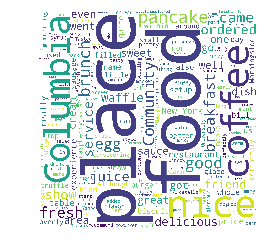

In [32]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000).generate(text)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [34]:
restaurant_data

[('community',
  'I ate here Monday night for a working dinner with a coworker. I immediately saw its reason for name, beyond the owner\'s fandom of the show of the same name: the tablet setup are nearly all communal long tables. There\'re rather few non-shared tables which is fine as not only is NYC filled with such setup but there\'s a liveliness in the Columbia area vibe which prefers this setup. There\'s a shortage of such nice sit-down restaurants in the Columbia area so this place is not only capitalizing on its presence but doing so with great style and flare.\n\nI ordered the beef burger which was very juicy, perfectly lean, well sauced, cooked as desired (medium-well, for those who wonder), and paired with a dill pickle, a handmade cole slaw that lacked mayo (which is good as mayo\'s pure trans-fat), and a spindle of fries. My coworker got the salmon sandwich, same review applies.\n\nAwesome bar alongside, but we didn\'t patronize it. Vast amounts of seating and an open kitche

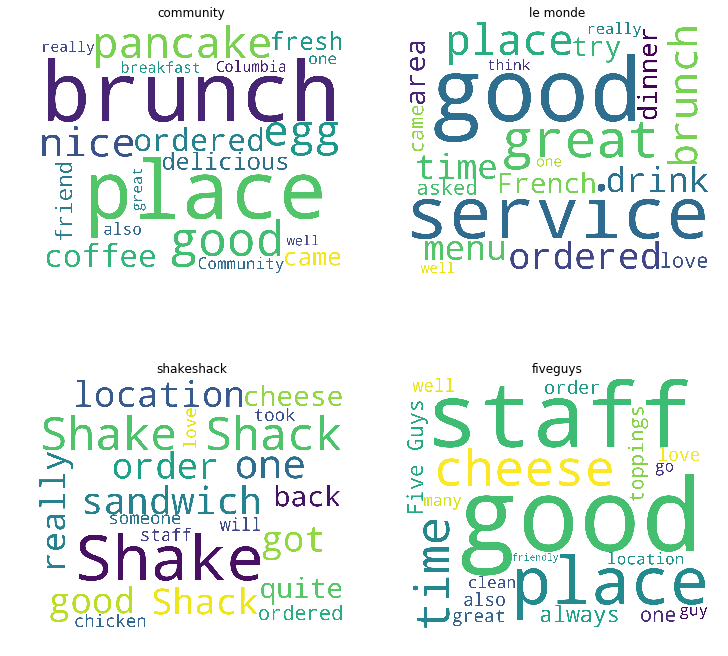

In [37]:
texts = restaurant_data
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
DELETE_WORDS = ['food','burger','fries']
def remove_words(text_string,DELETE_WORDS=DELETE_WORDS):
    for word in DELETE_WORDS:
        text_string = text_string.replace(word,' ')
    return text_string

#Remove short words
MIN_LENGTH = 0
def remove_short_words(text_string,min_length = MIN_LENGTH):
    word_list = text_string.split()
    for word in word_list:
        if len(word) < min_length:
            text_string = text_string.replace(' '+word+' ',' ',1)
    return text_string


#Set up side by side clouds
COL_NUM = 2
ROW_NUM = 2
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

for i in range(0,len(texts)):
    text_string = remove_words(texts[i][1])
    text_string = remove_short_words(text_string)
    ax = axes[i//2, i%2] 
    ax.set_title(texts[i][0])
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000,max_words=20).generate(text_string)
    ax.imshow(wordcloud)
    ax.axis('off')
plt.show()

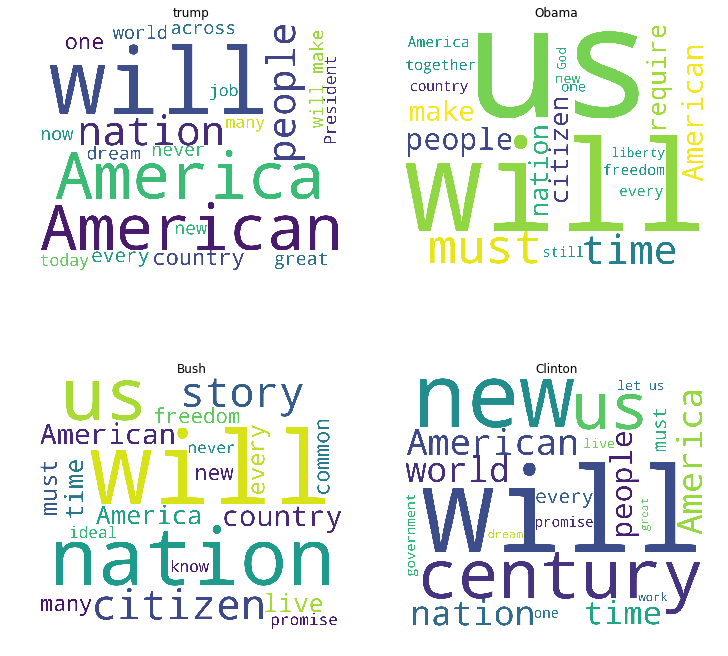

In [36]:
texts = [('trump',inaugural.raw('2017-Trump.txt')),('Obama',inaugural.raw('2013-Obama.txt')),
         ('Bush',inaugural.raw('2001-Bush.txt')),('Clinton',inaugural.raw('1997-Clinton.txt'))]
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
DELETE_WORDS = []
def remove_words(text_string,DELETE_WORDS=DELETE_WORDS):
    for word in DELETE_WORDS:
        text_string = text_string.replace(word,' ')
    return text_string

#Remove short words
MIN_LENGTH = 0
def remove_short_words(text_string,min_length = MIN_LENGTH):
    word_list = text_string.split()
    for word in word_list:
        if len(word) < min_length:
            text_string = text_string.replace(' '+word+' ',' ',1)
    return text_string


COL_NUM = 2
ROW_NUM = 2
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

for i in range(0,len(texts)):
    text_string = remove_words(texts[i][1])
    text_string = remove_short_words(text_string)
    ax = axes[i//2, i%2] 
    ax.set_title(texts[i][0])
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000,max_words=20).generate(text_string)
    ax.imshow(wordcloud)
    ax.axis('off')
plt.show()

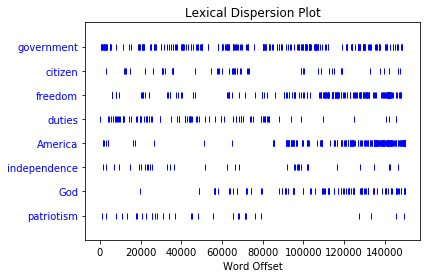

In [38]:
text4.dispersion_plot(["government", "citizen", "freedom", "duties", "America",'independence','God','patriotism'])

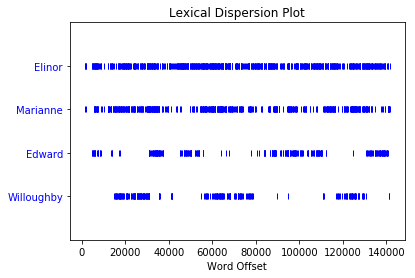

In [39]:

text2.dispersion_plot(['Elinor','Marianne','Edward','Willoughby'])

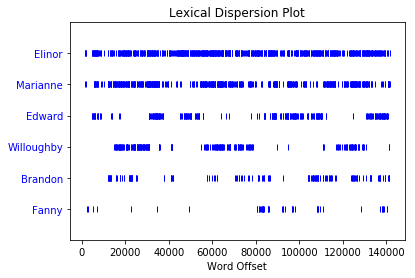

In [40]:
text2.dispersion_plot(['Elinor','Marianne','Edward','Willoughby','Brandon','Fanny'])

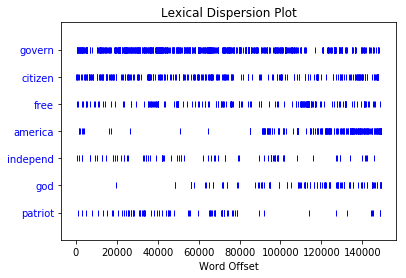

In [43]:
from nltk.stem.porter import PorterStemmer
from nltk import sent_tokenize,word_tokenize
p_stemmer = PorterStemmer()
text = inaugural.raw()
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')
sentences = sent_tokenize(striptext)
words = word_tokenize(striptext)
text = nltk.Text([p_stemmer.stem(i).lower() for i in words])
text.dispersion_plot(["govern", "citizen", "free", "america",'independ','god','patriot'])

In [64]:
!pip install vaderSentiment

In [65]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

ModuleNotFoundError: No module named 'vaderSentiment'

In [46]:
def vader_comparison(texts):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    headers = ['pos','neg','neu','compound']
    print("Name\t",'  pos\t','neg\t','neu\t','compound')
    analyzer = SentimentIntensityAnalyzer()
    for i in range(len(texts)):
        name = texts[i][0]
        sentences = sent_tokenize(texts[i][1])
        pos=compound=neu=neg=0
        for sentence in sentences:
            vs = analyzer.polarity_scores(sentence)
            pos+=vs['pos']/(len(sentences))
            compound+=vs['compound']/(len(sentences))
            neu+=vs['neu']/(len(sentences))
            neg+=vs['neg']/(len(sentences))
        print('%-10s'%name,'%1.2f\t'%pos,'%1.2f\t'%neg,'%1.2f\t'%neu,'%1.2f\t'%compound)

In [47]:
vader_comparison(restaurant_data)

Name	   pos	 neg	 neu	 compound
community  0.20	 0.03	 0.77	 0.34	
le monde   0.17	 0.04	 0.78	 0.22	
shakeshack 0.12	 0.09	 0.79	 0.08	
fiveguys   0.24	 0.03	 0.72	 0.33	


In [49]:
vader_comparison(all_addresses)


Name	   pos	 neg	 neu	 compound
1789-Washington.txt 0.17	 0.05	 0.79	 0.58	
1793-Washington.txt 0.07	 0.02	 0.91	 0.08	
1797-Adams.txt 0.18	 0.04	 0.77	 0.44	
1801-Jefferson.txt 0.16	 0.06	 0.78	 0.32	
1805-Jefferson.txt 0.15	 0.05	 0.80	 0.39	
1809-Madison.txt 0.18	 0.08	 0.74	 0.43	
1813-Madison.txt 0.15	 0.12	 0.73	 0.02	
1817-Monroe.txt 0.21	 0.06	 0.73	 0.42	
1821-Monroe.txt 0.17	 0.06	 0.78	 0.39	
1825-Adams.txt 0.15	 0.04	 0.81	 0.40	
1829-Jackson.txt 0.19	 0.03	 0.78	 0.61	
1833-Jackson.txt 0.16	 0.03	 0.81	 0.46	
1837-VanBuren.txt 0.16	 0.08	 0.76	 0.33	
1841-Harrison.txt 0.13	 0.06	 0.81	 0.26	
1845-Polk.txt 0.15	 0.05	 0.80	 0.31	
1849-Taylor.txt 0.19	 0.03	 0.78	 0.64	
1853-Pierce.txt 0.16	 0.07	 0.77	 0.35	
1857-Buchanan.txt 0.17	 0.07	 0.76	 0.36	
1861-Lincoln.txt 0.10	 0.08	 0.81	 0.06	
1865-Lincoln.txt 0.13	 0.12	 0.76	 0.02	
1869-Grant.txt 0.20	 0.03	 0.76	 0.51	
1873-Grant.txt 0.16	 0.06	 0.78	 0.33	
1877-Hayes.txt 0.18	 0.04	 0.77	 0.55	
1881-Garfield.txt 0.17	 0.09	

In [63]:
import nltk
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
sample_text = """
I was walking along thinking of many things. For e.g., I walked with my friend Bilkees Bijou through the campus of Columbia University. I 
thought of birds, of bees, of sealing wax. I thought of cabbages and kings.
"""
sent_detector.tokenize(sample_text)

['\nI was walking along thinking of many things.',
 'For e.g., I walked with my friend Bilkees Bijou through the campus of Columbia University.',
 'I \nthought of birds, of bees, of sealing wax.',
 'I thought of cabbages and kings.']

In [66]:
word_list = nltk.word_tokenize(sent_detector.tokenize(sample_text)[1])
word_list

['For',
 'e.g.',
 ',',
 'I',
 'walked',
 'with',
 'my',
 'friend',
 'Bilkees',
 'Bijou',
 'through',
 'the',
 'campus',
 'of',
 'Columbia',
 'University',
 '.']

In [67]:
nltk.pos_tag(word_list)


[('For', 'IN'),
 ('e.g.', 'NN'),
 (',', ','),
 ('I', 'PRP'),
 ('walked', 'VBD'),
 ('with', 'IN'),
 ('my', 'PRP$'),
 ('friend', 'NN'),
 ('Bilkees', 'NNP'),
 ('Bijou', 'NNP'),
 ('through', 'IN'),
 ('the', 'DT'),
 ('campus', 'NN'),
 ('of', 'IN'),
 ('Columbia', 'NNP'),
 ('University', 'NNP'),
 ('.', '.')]

In [69]:
chunked[-2].label()

'ORGANIZATION'

In [70]:
for j in chunked:
    try:
        print(j,j.label())
    except:
        continue

(PERSON Bilkees/NNP Bijou/NNP) PERSON
(ORGANIZATION Columbia/NNP University/NNP) ORGANIZATION


In [71]:
tagged = nltk.pos_tag(word_list)
chunked = nltk.ne_chunk(tagged)
hasattr(chunked[-2],'label')


True

In [72]:
en={}
try:
    sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
    #sentences = sent_detector.tokenize(community_data.raw().strip())
    sentences = sent_detector.tokenize(sample_text)
    for sentence in sentences:
            tokenized = nltk.word_tokenize(sentence)
            tagged = nltk.pos_tag(tokenized)
            chunked = nltk.ne_chunk(tagged)
            for tree in chunked:
                if hasattr(tree, 'label'):
                    ne = ' '.join(c[0] for c in tree.leaves())
                    print(ne)
                    en[ne] = [tree.label(), ' '.join(c[1] for c in tree.leaves())]
except Exception as e:
    print(str(e))
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(en)

Bilkees Bijou
Columbia University
{   'Bilkees Bijou': ['PERSON', 'NNP NNP'],
    'Columbia University': ['ORGANIZATION', 'NNP NNP']}


In [73]:
en={}
try:
    sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
    sentences = sent_detector.tokenize(community_data.raw().strip())
    for sentence in sentences:
            tokenized = nltk.word_tokenize(sentence)
            tagged = nltk.pos_tag(tokenized)
            chunked = nltk.ne_chunk(tagged)
            for tree in chunked:
                if hasattr(tree, 'label'):
                    ne = ' '.join(c[0] for c in tree.leaves())
                    en[ne] = [tree.label(), ' '.join(c[1] for c in tree.leaves())]
except Exception as e:
    print(str(e))
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(en)

{   'America': ['GPE', 'NNP'],
    'Awesome': ['GPE', 'NNP'],
    'BEST': ['ORGANIZATION', 'NNP'],
    'Bill': ['PERSON', 'NN'],
    'Boston': ['GPE', 'NNP'],
    'Bottomless': ['GPE', 'NNP'],
    'Broadway': ['GPE', 'NNP'],
    'Brooklyn': ['GPE', 'NNP'],
    'Brunch': ['PERSON', 'NNP'],
    'CU': ['ORGANIZATION', 'NNP'],
    'Came': ['GPE', 'NN'],
    'Cana': ['PERSON', 'NNP'],
    'Cheaper': ['GPE', 'NNP'],
    'Colombia': ['GPE', 'NNP'],
    'Columbia': ['GPE', 'NNP'],
    'Columbia University': ['ORGANIZATION', 'NNP NNP'],
    'Columbian': ['GPE', 'JJ'],
    'Community': ['ORGANIZATION', 'NNP'],
    'Community Food': ['ORGANIZATION', 'NNP NNP'],
    'Company': ['ORGANIZATION', 'NNP'],
    'Country Breakfast': ['ORGANIZATION', 'NNP NNP'],
    'Delish': ['GPE', 'NNP'],
    'Dinner': ['GPE', 'NN'],
    'Disclaimer': ['GPE', 'NN'],
    'Everyone': ['GPE', 'NN'],
    'FRESH': ['ORGANIZATION', 'NNP'],
    'Fire Island Beer': ['ORGANIZATION', 'NNP NNP NNP'],
    'Flor': ['GPE', 'NNP'],
 

In [74]:
def get_labeled_text(text,label_type='ALL'):
    en={}
    try:
        sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
        sentences = sent_detector.tokenize(text.strip())
        for sentence in sentences:
                tokenized = nltk.word_tokenize(sentence)
                tagged = nltk.pos_tag(tokenized)
                chunked = nltk.ne_chunk(tagged)
                for tree in chunked:
                    if hasattr(tree, 'label'):
                        if not label_type == "ALL":
                            if not tree.label() == label_type:
                                continue
                        ne = ' '.join(c[0] for c in tree.leaves())
                        en[ne] = [tree.label(), ' '.join(c[1] for c in tree.leaves())]
    except Exception as e:
        return str(e)
    return en
get_labeled_text(community_data.raw(),'ORGANIZATION')

{'NYC': ['ORGANIZATION', 'NNP'],
 'Community': ['ORGANIZATION', 'NNP'],
 'Huevos Rancheros': ['ORGANIZATION', 'NNP NNP'],
 'Company': ['ORGANIZATION', 'NNP'],
 'GF': ['ORGANIZATION', 'NNP'],
 'CU': ['ORGANIZATION', 'NNP'],
 'Fire Island Beer': ['ORGANIZATION', 'NNP NNP NNP'],
 'Lighthouse': ['ORGANIZATION', 'NNP'],
 'NOT': ['ORGANIZATION', 'NNP'],
 'FRESH': ['ORGANIZATION', 'NNP'],
 'THE': ['ORGANIZATION', 'NNP'],
 'BEST': ['ORGANIZATION', 'NNP'],
 'VERY': ['ORGANIZATION', 'NNP'],
 'POTATO': ['ORGANIZATION', 'NNP'],
 'GOOD': ['ORGANIZATION', 'JJ'],
 'GREAT FOR': ['ORGANIZATION', 'NNP NNP'],
 'GLUTEN': ['ORGANIZATION', 'NNP'],
 'HOURS': ['ORGANIZATION', 'NNP'],
 'Newbury': ['ORGANIZATION', 'NNP'],
 'NBC': ['ORGANIZATION', 'NNP'],
 'Yahoo': ['ORGANIZATION', 'NN'],
 'REAL': ['ORGANIZATION', 'JJ'],
 'Columbia University': ['ORGANIZATION', 'NNP NNP'],
 'Community Food': ['ORGANIZATION', 'NNP NNP'],
 'Troy Barnes': ['ORGANIZATION', 'NN NNPS'],
 'Country Breakfast': ['ORGANIZATION', 'NNP NNP'

In [61]:
def get_affect(text,word,lower=True):
    import nltk
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()
    sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
    sentences = sent_detector.tokenize(text.strip())
    sentence_count = 0
    running_total = 0
    for sentence in sentences:
        if lower: 
            sentence = sentence.lower()
            word = word.lower()
        if word in sentence:
            vs = analyzer.polarity_scores(sentence) 
            running_total += vs['compound']
            sentence_count += 1
    if sentence_count == 0: return 0
    return running_total/sentence_count

In [62]:
print(get_affect(community_data.raw(),'service',True))
print(get_affect(le_monde_data.raw(),'service',True))
print(get_affect(shakeshack_data.raw(),'service',True))
print(get_affect(fiveguys_data.raw(),'service',True))

0.4321428571428571
0.22273125
0.75735
0.4939


In [63]:
print(get_affect(gutenberg.raw('shakespeare-hamlet.txt'),'Gertrude',False))
print(get_affect(gutenberg.raw('shakespeare-hamlet.txt'),'Hamlet',False))
print(get_affect(gutenberg.raw('shakespeare-hamlet.txt'),'Horatio',False))


-0.01654166666666666
0.06847959183673472
0.09861794871794871


In [64]:
get_labeled_text(inaugural.raw('2017-trump.txt'))

{'America': ['GPE', 'NNP'],
 'American': ['GPE', 'JJ'],
 'Americans': ['GPE', 'NNPS'],
 'Bible': ['ORGANIZATION', 'NNP'],
 'Bush': ['PERSON', 'NNP'],
 'Carter': ['PERSON', 'NNP'],
 'Clinton': ['PERSON', 'NNP'],
 'D.C.': ['GPE', 'NNP'],
 'Detroit': ['GPE', 'NNP'],
 'Earth': ['LOCATION', 'NNP'],
 'Everyone': ['GPE', 'NN'],
 'First Lady Michelle Obama': ['PERSON', 'NNP NNP NNP NNP'],
 'God': ['PERSON', 'NNP'],
 'Islamic': ['ORGANIZATION', 'NNP'],
 'Justice Roberts': ['ORGANIZATION', 'NNP NNP'],
 'Nebraska': ['GPE', 'NNP'],
 'Obama': ['PERSON', 'NNP'],
 'United States': ['GPE', 'NNP NNPS'],
 'Washington': ['GPE', 'NNP']}

In [65]:
for key in get_labeled_text(inaugural.raw('2017-trump.txt'),'PERSON'):
    print(key,get_affect(inaugural.raw('2017-trump.txt'),key))

Carter 0.7096
Clinton 0.7096
Bush 0.7096
Obama 0.78925
First Lady Michelle Obama 0.8689
God 0.6595600000000001


In [66]:
nltk.Text(community_data.words()).concordance('Columbia',100)

Displaying 8 of 8 matches:
 such setup but there ' s a liveliness in the Columbia area vibe which prefers this setup . There ' 
ge of such nice sit - down restaurants in the Columbia area so this place is not only capitalizing o
mosasas . Community is a brunch place next to Columbia . I came here one day to meet up with my cous
 day to meet up with my cousin who studies at Columbia . Seated around 10 mins on a cozy Sat morning
nd with these crowds . " I have a degree from Columbia , and now I have to get one from America ." -
ver , is actually pursuing a REAL degree from Columbia University -- not Colombia the country , unli
 than that -- and because of its proximity to Columbia ' s campus . Community Food & Juice is litera
 The restaurant is within walking distance of Columbia , and I would recommend for a nice brunch in 
